# サンプリング周波数

正弦波を**連続的な物理モデル**で表現した場合、振幅：A、周波数：f，時間：tとすると次式のような**連続時間信号**となる。

$$
y = Asin(2 \pi f t)
$$

一方、正弦波をデジタルな世界で表現する場合、連続時間信号から離散時間信号へ変換する必要がある。離散時間信号への変換は、連続時間信号を一定時間にサンプリングするということなので、サンプリング周波数：fsとした場合、次式となる。

$$
y = Asin(2 \pi \frac{f}{fs} t)
$$

どの程度で信号をサンプリングすればよいかは、サンプリング定理で定められている。次式のようにfmaxを連続時間信号の最大周波数とすると、連続時間信号の最大周波数の2倍以上でサンプリングすればよい。
$$
fs ＞2･fmax
$$

##  ノイズ印加正弦波

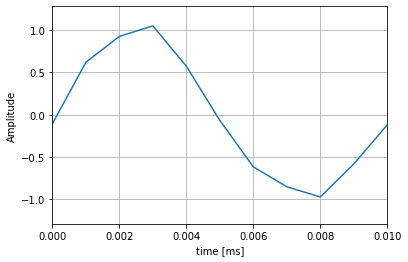

In [34]:
# ----------------
# import library 
# ----------------

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# ----------------
# 設定値
# ----------------

# サンプリング周波数　[Hz]
fs =  10**6
# ナイキスト周波数　[Hz]
fn =  fs / ( 2  )
# 正弦波の周波数 [Hz]
f  =  100000
# 分解能
rezo = 18
# データサイズ
n = 2 ** rezo
# 時間軸の作成
# NOTE: 0から1/fまで、1/fs間隔
t = np.arange(0,  n / fs , 1 / fs) # 時間 [s]

# オーバーサンプリング比
over_rate = 4

# ----------------
# 正弦波の作成
# ----------------

# 正弦波
y1 = np.sin( 2 * np.pi * f  * t)
# ノイズ
y2 = np.random.randn(t.size)*0.05

# ノイズ印加の正弦波
y = y1 + y2

# ----------------
# 波形表示
# ----------------

plt.plot(t*1000,y)
# 表示範囲：信号の周波数付近
plt.xlim(0, 1/f*1000 )
plt.xlabel('time [ms]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## オーバーサンプリング
TODO:オーバーサンプリングの原理を書く

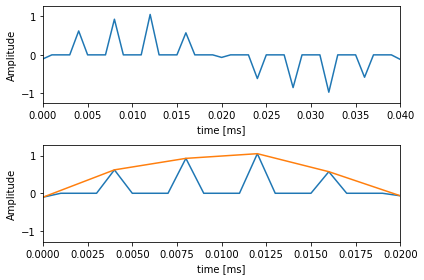

In [35]:
# ----------------
# オーバーサンプリングの準備
# ----------------

# 信号のデータサイズをコピー
num =t.size

# 信号の配列をコピー
y4 =y1

# データ間に設定した数だけ0を挿入
for i in range(num):
    if   i == 0:
        index =0
        y4[i] =y[i]
    elif ( i ) % over_rate == 0 :
        index = index + 1
        y4[i] =y[index]
    else :
        y4[i] =0

# ------------------------
# グラフの表示
# ------------------------

# グラフ枠の作成
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# ---- 時間信号のデータ表示 ---- #
ax1.plot(t*1000,y4)
# 表示範囲：信号の周波数付近
ax1.set_xlim(0, 1/f*1000* over_rate )
ax1.set_xlabel('time [ms]')
ax1.set_ylabel('Amplitude')

# ---- 元信号との比較 （半分だけ表示）---- #
ax2.plot(t*1000,y4)
ax2.plot(t*1000*over_rate,y)
# 表示範囲：信号の周波数付近
ax2.set_xlim(0, 1/f*1000* over_rate /2)
ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Amplitude')


# ---- 時間信号のデータ表示 ---- #

# グラフのラベルを重ならないようにする
plt.tight_layout()


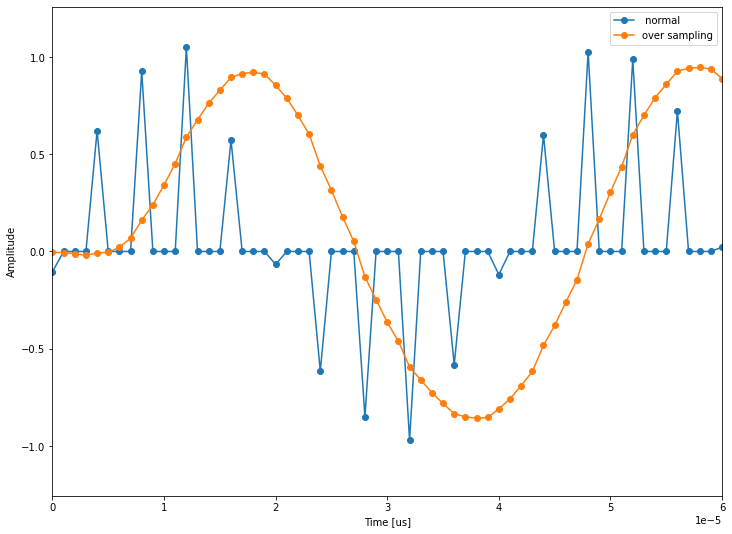

In [36]:
# Size of FIR filter
numtaps = 16
# Cut-off Frequency
cutoff = 13800.0

# ------------------------
# FIRフィルタ
# ------------------------

# TODO: remezは何か調査
# taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
# デジタルフィルターの係数を与えてその応答を，複素振幅で求める．
# w : 周波数点 0 ~ pi ラジアン/サンプル単位
# h : 周波数点における複素周波数応答
# w, h = signal.freqz(taps, [1], worN=2000)

b = signal.firwin(numtaps, cutoff/fn)  

w, h = signal.freqz(b)


filtered = signal.lfilter(b, 1.0, y4)

delay = fs * (numtaps-1)/2

# ------------------------
# グラフの表示
# ------------------------

plt.figure(figsize=(12,9))
plt.plot(t, y4,'-o',label=" normal")
plt.plot(t, filtered * over_rate, '-o',label="over sampling")
plt.xlim(0, over_rate  / f * 1.5 )
# plt.ylim(-1.2, 1.2)
plt.legend(loc="upper right")
plt.xlabel("Time [us]")
plt.ylabel("Amplitude")
plt.show()

## 同じデータを設定回数分サンプリングした場合の正弦波形

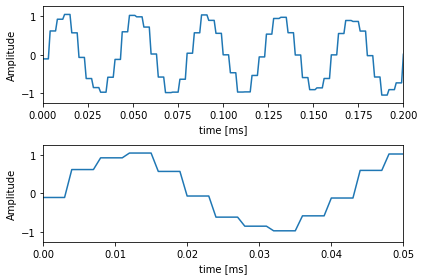

In [37]:
# ----------------
# 同データサンプリングの設定
# ----------------

num =t.size
y3 =y1
same_num = over_rate

for i in range(num):
    if   i == 0:
        index =0
        y3[i] =y[i]
    elif ( i ) % same_num == 0 :
        index = index + 1
        y3[i] =y[index]
    else :
        y3[i] =y3[i-1]

# ------------------------
# グラフの表示
# ------------------------

# グラフ枠の作成
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# ---- 時間信号のデータ表示 ---- #
ax1.plot(t*1000,y3)
# 表示範囲：信号の周波数付近
ax1.set_xlim(0, 1/f*1000* same_data )
ax1.set_xlabel('time [ms]')
ax1.set_ylabel('Amplitude')

# ---- 拡大のデータ表示 ---- #
ax2.plot(t*1000,y3)
# 表示範囲：信号の周波数付近
ax2.set_xlim(0, 1/f*1000* same_data /4 )
ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Amplitude')


# ---- 時間信号のデータ表示 ---- #

# グラフのラベルを重ならないようにする
plt.tight_layout()

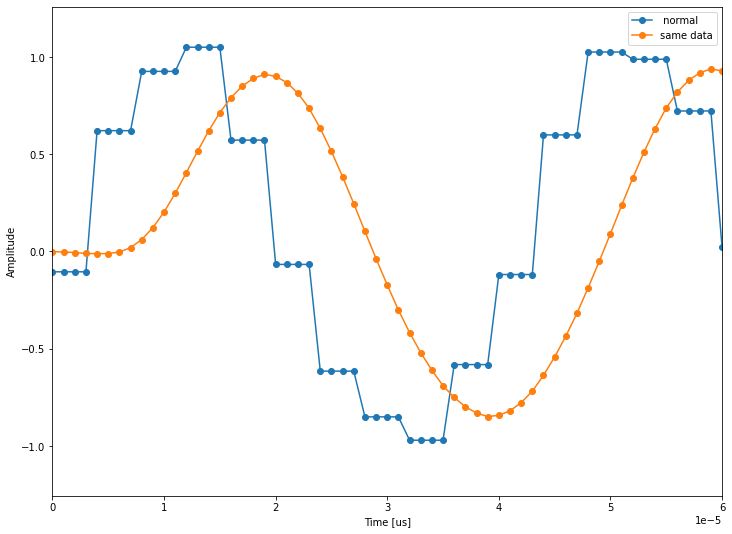

In [38]:
# ------------------------

# TODO: remezは何か調査
# taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
# デジタルフィルターの係数を与えてその応答を，複素振幅で求める．
# w : 周波数点 0 ~ pi ラジアン/サンプル単位
# h : 周波数点における複素周波数応答
# w, h = signal.freqz(taps, [1], worN=2000)

b = signal.firwin(numtaps, cutoff/fn)  

w, h = signal.freqz(b)


same_filtered = signal.lfilter(b, 1.0, y3)

same_delay = fs * (numtaps-1)/2

# ------------------------
# グラフの表示
# ------------------------

plt.figure(figsize=(12,9))
plt.plot(t, y3,'-o',label=" normal")
plt.plot(t, same_filtered , '-o',label="same data")
plt.xlim(0, same_num  / f *1.5 )
# plt.ylim(-1.2, 1.2)
plt.legend(loc="upper right")
plt.xlabel("Time [us]")
plt.ylabel("Amplitude")
plt.show()

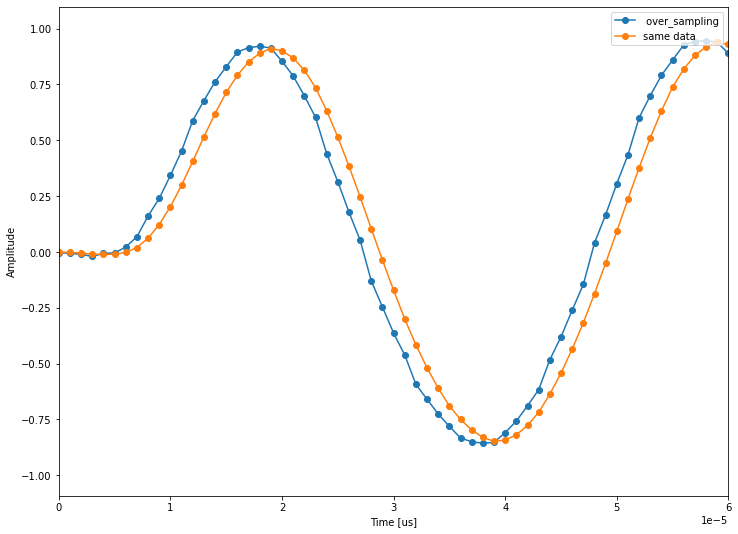

In [43]:
# ------------------------
# グラフの表示
# ------------------------

# オーバーサンプリングと同値の比較

plt.figure(figsize=(12,9))
plt.plot(t, filtered * over_rate,'-o',label=" over_sampling")
plt.plot(t, same_filtered , '-o',label="same data")
plt.xlim(0, same_num  / f *1.5 )
# plt.ylim(-1.2, 1.2)
plt.legend(loc="upper right")
plt.xlabel("Time [us]")
plt.ylabel("Amplitude")
plt.show()